In [ ]:
from IPython.display import display, HTML

full_parchment_style_with_headings = """
<style>
  /* Container */
  .notes-container {
    margin: 2em auto;
    max-width: 900px;
    font-family: 'Palatino Linotype', 'Book Antiqua', Palatino, serif;
    background: #f7f1e1; /* warm cream parchment */
    padding: 2em 3em;
    border-radius: 16px;
    box-shadow: 0 6px 15px rgba(100, 80, 40, 0.15);
    color: #5b4a2e;
  }

  /* Cards styled like aged parchment */
  .note-card {
    background: linear-gradient(135deg, #fdf6e3 0%, #f3ead6 100%);
    border: 1.5px solid #d1bfa7;
    border-radius: 14px;
    padding: 2.5em 3em;
    margin-bottom: 2.8em;
    box-shadow:
      inset 0 0 15px 2px #f0e5cc,
      0 5px 20px rgba(121, 100, 52, 0.15);
    transition: box-shadow 0.3s ease;
  }
  .note-card:hover {
    box-shadow:
      inset 0 0 20px 3px #f3ead6,
      0 8px 28px rgba(121, 100, 52, 0.25);
  }

  /* Headings outside cards */
  h1, h2 {
    font-family: 'Goudy Old Style', serif;
    color: #6a573a;
    text-shadow: 1px 1px 0 #e6dac3;
  }
  h1 {
    font-size: 3em;
    font-weight: 700;
    margin-bottom: 0.7em;
    border-bottom: 4px solid #cbb991;
    padding-bottom: 0.4em;
  }
  h2 {
    font-size: 2.2em;
    font-weight: 600;
    margin-bottom: 0.6em;
    border-bottom: 2px solid #d1bfa7;
    padding-bottom: 0.3em;
  }

  /* Headings inside cards */
  .note-card h3 {
    font-family: 'Goudy Old Style', serif;
    font-size: 1.8em;
    font-weight: 600;
    color: #7a6645;
    margin-top: 2.5em;
    margin-bottom: 0.8em;
    border-bottom: 2px solid #d1bfa7;
    padding-bottom: 0.3em;
  }

  /* Text styles */
  .note-card p,
  .note-card li,
  .note-card ol li,
  .note-card table td,
  .note-card table th {
    font-size: 17px;
    line-height: 1.55;
    color: #5b4a2e;
  }
  .note-card p {
    margin-bottom: 1.5em;
  }

  /* Lists */
  .note-card ul {
    list-style-type: square;
    margin-left: 1.8em;
    padding-left: 0.5em;
  }
  .note-card li {
    margin-bottom: 1em;
  }
  .note-card ol {
    margin-left: 1.8em;
    padding-left: 0.5em;
  }
  .note-card ol li {
    margin-bottom: 1.3em;
  }

  /* Tables */
  .note-card table {
    width: 100%;
    border-collapse: separate;
    border-spacing: 0;
    font-family: 'Georgia', serif;
    background: #faf2d6;
    border-radius: 12px;
    box-shadow: inset 0 0 8px #dbcea4;
    color: #6c5d3c;
    font-size: 17px;
  }
  .note-card thead tr {
    background-color: #e8dca5;
  }
  .note-card thead th {
    padding: 1em 1.5em;
    border-bottom: 2px solid #cbb991;
    text-align: left;
    font-weight: 600;
  }
  .note-card tbody tr {
    background: #faf2d6;
  }
  .note-card tbody td {
    padding: 1em 1.5em;
    border-bottom: 1px solid #d1bfa7;
    vertical-align: top;
  }
  .note-card tbody tr:last-child td {
    border-bottom: none;
  }

  /* Math emphasis block */
  .math-center {
    text-align: center;
    font-size: 15px;
    color: #7d6b43;
    background: #f9f3d4;
    padding: 1.2em 1.8em;
    border-radius: 14px;
    margin-top: 1.6em;
    margin-bottom: 2em;
    font-style: italic;
    box-shadow: inset 0 0 10px rgba(120,100,40,0.12);
  }

  /* Info callout */
  .info {
    display: inline-block;
    background-color: #f1e6c9;
    color: #796e45;
    font-weight: 600;
    padding: 0.5em 1em;
    border-radius: 10px;
    box-shadow: 0 2px 5px rgba(120, 110, 50, 0.18);
  }
</style>

"""

display(HTML(full_parchment_style_with_headings))


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/mustafa/miniconda3/envs/t2/lib/python3.13/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [17]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, regularization_strength=0.01, n_iters=1000, log_every=100, verbose=False):
        self.learning_rate = learning_rate
        self.regularization_strength = regularization_strength
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

        self.verbose = verbose
        self.log_every = log_every

        self.loss_history = []

    def _forward(self, X):
        # Compute the raw scores (w·X - b)
        return np.dot(X, self.weights) - self.bias

    def _compute_loss(self, X, y):
        """
        Hinge loss + L2 regularization
        
        loss = (1/m) sum max(0, 1 - y_i * f_i) + lambda * ||w||^2
        """
        distances = 1 - y * self._forward(X)
        distances = np.maximum(0, distances)  # hinge loss max(0, 1 - y*f)
        hinge_loss = np.mean(distances)

        reg_loss = self.regularization_strength * np.dot(self.weights, self.weights)  # L2 regularization
        return hinge_loss + reg_loss

    # def _backward(self, X, y):
    #     """
    #     Compute gradients of weights and bias for hinge loss + L2 regularization.
    #     """
    #     n_samples, n_features = X.shape
    #     weights_gradient = np.zeros(n_features)
    #     bias_gradient = 0

    #     for current_index, current_row in enumerate(X):
    #         condition = y[current_index] * (np.dot(current_row, self.weights) - self.bias) >= 1
    #         if condition:
    #             # Only regularization gradient
    #             weights_gradient += 2 * self.regularization_strength * self.weights
    #             # Bias gradient zero here
    #         else:
    #             # Hinge loss + regularization gradients
    #             weights_gradient += 2 * self.regularization_strength * self.weights - y[current_index] * current_row
    #             bias_gradient += -y[current_index]

    #     weights_gradient = weights_gradient / n_samples
    #     bias_gradient = bias_gradient / n_samples

    #     return weights_gradient, bias_gradient

    def _backward(self, X, y, scores):
        n_samples = X.shape[0]
        condition = y * scores >= 1

        weights_gradient = 2 * self.regularization_strength * self.weights
        bias_gradient = 0

        if not np.all(condition):
            X_misclassified = X[~condition]
            y_misclassified = y[~condition]
            weights_gradient -= y_misclassified @  X_misclassified
            bias_gradient -= np.sum(y_misclassified)

        weights_gradient = weights_gradient / n_samples
        bias_gradient = bias_gradient / n_samples

        return weights_gradient, bias_gradient

    def _update(self, weights_gradient, bias_gradient):
        self.weights -= self.learning_rate * weights_gradient
        self.bias -= self.learning_rate * bias_gradient

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()

        y_ = np.where(y <= 0, -1, 1)
        n_features = X.shape[1]

        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            # 1) Forward pass (raw scores)
            scores = self._forward(X)

            # 2) Backward pass (compute gradients)
            dw, db = self._backward(X, y_, scores)

            # 3) Parameter update
            self._update(dw, db)

            # 4) Compute and store loss (for consistency & monitoring)
            loss = self._compute_loss(X, y_)
            self.loss_history.append(loss)

            if self.verbose and (i % self.log_every == 0):
                print(f"Iteration {i} | Loss = {loss:.4f}")
        
        return self

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        approx = self._forward(X)
        return np.sign(approx)
    
    def plot_losses(self, ax=None):
        if ax is None:
            ax = plt.gca()

        sns.lineplot(self.loss_history, label=f'{self.loss_history[-1]:.2f}', ax=ax)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Loss')
        ax.set_title('Loss History')
        ax.grid(alpha=0.5)

Predictions: [1. 1. 1. 1. 1. 1.]
Actual:      [ 1 -1 -1  1  1 -1]


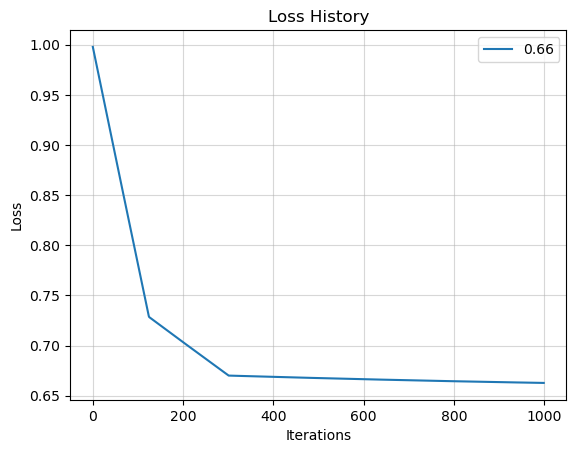

In [10]:
X_train = np.array([[2, 3], [1, 1], [2, 1], [3, 4], [5, 6], [1, 0]])
y_train = np.array([1, -1, -1, 1, 1, -1])

svm = LinearSVM(learning_rate=0.0005, regularization_strength=0.1, n_iters=1000)
svm.fit(X_train, y_train)

preds = svm.predict(X_train)
print("Predictions:", preds)
print("Actual:     ", y_train)

svm.plot_losses()

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


data = load_breast_cancer(as_frame=True)


features = data.data
target = data.target


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, shuffle=True, random_state=42)